<a href="https://colab.research.google.com/github/RSalgadoAyala/Python_test/blob/main/TestGit_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerias**

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker

**Importando datos de GitHub**

[Link a repository](https://github.com/RSalgadoAyala/Python_test/tree/main)

Es importante copiar el enlace del archivo desde Raw, de otra forma no se importa el enlace


In [2]:
# creando data frame para leer los datos
df_doors=pd.read_csv('https://raw.githubusercontent.com/RSalgadoAyala/Python_test/main/LDP_DoorsV01.csv?raw=true')

In [3]:
# leyendo los primeros 5 datos del archivo
df_doors.head()

,Mold,Sample,Squareness Descuadre FC,Flange Angle IZQ SUP (jaladera),Flange Angle IZQ INF,Flange Angle DER SUP (bisagra),Flange Angle DER INF,Inner Door Position Bottom INF IZQ,Inner Door Position Bottom INF DER,Inner Door Position Center IZQ SUP,Inner Door Position Center IZQ INF,Inner Door Position Center DER SUP,Inner Door Position Center DER INF,Inner Door Position Top SUP IZQ,Inner Door Position Top SUP DER,Door width SUP,Door width INF,Inner door width (omega) Sup,Inner door width (omega) Inf,Inner door height (omega) Izq,Inner door height (omega) Der,Omega inner width Sup Izq,Omega inner width Sup Cent,Omega inner width Sup Der,Omega inner width Der Sup,Omega inner width Der Cent,Omega inner width Der Inf,Omega inner width Inf Der,Omega inner width Inf Cent,Omega inner width Inf Izq,Omega inner width Izq Inf,Omega inner width Izq Cent,Omega inner width Izq Sup,Omega inner depth Sup Izq,Omega inner depth Sup Cent,Omega inner depth Sup Der,Omega inner depth Der Sup,Omega inner depth Der Cent,Omega inner depth Der Inf,Omega inner depth Inf Der,Omega inner depth Inf Cent,Omega inner depth Inf Izq,Omega inner depth Izq Inf,Omega inner depth Izq Cent,Omega inner depth Izq Sup
0,1,1,1.0,91.46,91.22,89.71,89.78,21.28,21.03,29.59,27.02,29.53,29.58,45.63,45.73,614.77,614.23,548.17,547.30,455.35,455.30,5.63,5.23,5.44,5.51,5.30,5.72,5.80,5.27,5.77,5.52,5.31,5.52,9.74,9.51,9.98,9.51,9.34,9.50,9.35,9.52,9.54,9.38,9.42,9.38
1,1,2,1.0,91.36,91.25,89.92,89.88,21.36,21.18,29.78,27.15,29.66,29.45,45.52,45.48,614.63,614.35,548.41,547.18,455.21,455.38,5.58,5.30,5.41,5.50,5.27,5.69,5.78,5.32,5.72,5.50,5.30,5.49,9.72,9.54,9.95,9.49,9.31,9.47,9.38,9.50,9.52,9.35,9.44,9.36
2,1,3,1.0,91.56,91.44,89.88,89.62,21.35,21.24,29.65,27.25,29.45,29.38,45.55,45.35,614.55,614.28,548.30,547.02,455.26,455.40,5.56,5.31,5.40,5.49,5.28,5.71,5.76,5.30,5.75,5.48,5.29,5.48,9.69,9.49,9.97,9.45,9.29,9.53,9.31,9.47,9.49,9.36,9.41,9.34
3,2,4,1.0,87.85,88.20,91.63,91.45,20.83,21.05,30.28,29.03,28.25,30.01,44.54,45.26,614.36,614.22,546.93,545.71,455.60,455.32,5.42,5.24,5.78,5.61,5.25,5.54,5.60,5.30,5.52,5.46,5.20,5.32,10.13,9.76,9.91,9.20,9.54,10.40,9.23,9.63,9.91,9.33,10.05,9.76
4,2,5,1.0,87.95,88.32,91.52,91.66,20.94,21.16,30.11,29.11,28.39,30.15,44.62,45.39,614.26,614.38,547.01,546.12,455.45,455.38,5.40,5.20,5.68,5.54,5.30,5.50,5.54,5.34,5.47,5.41,5.18,5.30,10.08,9.81,9.95,9.23,9.59,10.25,9.28,9.56,9.97,9.35,10.09,9.70


In [4]:
# obteniendo los estadìstica descriptiva del archivo
df_doors.describe()

,Mold,Sample,Squareness Descuadre FC,Flange Angle IZQ SUP (jaladera),Flange Angle IZQ INF,Flange Angle DER SUP (bisagra),Flange Angle DER INF,Inner Door Position Bottom INF IZQ,Inner Door Position Bottom INF DER,Inner Door Position Center IZQ SUP,Inner Door Position Center IZQ INF,Inner Door Position Center DER SUP,Inner Door Position Center DER INF,Inner Door Position Top SUP IZQ,Inner Door Position Top SUP DER,Door width SUP,Door width INF,Inner door width (omega) Sup,Inner door width (omega) Inf,Inner door height (omega) Izq,Inner door height (omega) Der,Omega inner width Sup Izq,Omega inner width Sup Cent,Omega inner width Sup Der,Omega inner width Der Sup,Omega inner width Der Cent,Omega inner width Der Inf,Omega inner width Inf Der,Omega inner width Inf Cent,Omega inner width Inf Izq,Omega inner width Izq Inf,Omega inner width Izq Cent,Omega inner width Izq Sup,Omega inner depth Sup Izq,Omega inner depth Sup Cent,Omega inner depth Sup Der,Omega inner depth Der Sup,Omega inner depth Der Cent,Omega inner depth Der Inf,Omega inner depth Inf Der,Omega inner depth Inf Cent,Omega inner depth Inf Izq,Omega inner depth Izq Inf,Omega inner depth Izq Cent,Omega inner depth Izq Sup
count,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,3.500000,9.500000,1.0,88.910000,89.261111,90.868889,90.868333,21.013333,21.109444,29.703889,28.797778,28.920000,29.357778,44.865556,44.951111,614.469444,614.351667,547.307778,547.180556,455.272778,455.317778,5.628333,5.315000,5.600556,5.583889,5.335000,5.551111,5.626111,5.332222,5.549444,5.437222,5.297778,5.433889,9.676667,9.621111,9.861111,9.416111,9.490556,9.788333,9.358889,9.525556,9.770000,9.347778,9.588889,9.487222
std,1.757338,5.338539,0.0,1.365305,1.190620,0.727048,0.711893,0.240661,0.248228,0.508494,0.949492,0.504136,0.464930,0.449826,0.447357,0.174507,0.078234,0.493196,0.728483,0.210652,0.173156,0.273566,0.065192,0.224878,0.101700,0.093824,0.080942,0.106999,0.104293,0.106521,0.086283,0.071583,0.094130,0.273087,0.234066,0.211128,0.125423,0.185551,0.326483,0.052791,0.191717,0.235422,0.108658,0.249090,0.133584
min,1.000000,1.000000,1.0,87.460000,87.590000,89.710000,89.620000,20.660000,20.710000,28.850000,27.020000,28.250000,28.550000,44.240000,44.290000,614.220000,614.220000,546.750000,545.710000,454.760000,454.980000,5.300000,5.200000,5.340000,5.450000,5.220000,5.440000,5.490000,5.100000,5.410000,5.290000,5.180000,5.240000,9.200000,9.150000,9.540000,9.200000,9.180000,9.290000,9.230000,9.150000,9.410000,9.100000,9.290000,9.310000
25%,2.000000,5.250000,1.0,87.905000,88.275000,90.275000,90.392500,20.835000,20.890000,29.410000,28.315000,28.435000,29.057500,44.550000,44.525000,614.380000,614.282500,546.972500,546.897500,455.165000,455.172500,5.405000,5.280000,5.442500,5.502500,5.270000,5.500000,5.540000,5.290000,5.472500,5.380000,5.245000,5.367500,9.555000,9.517500,9.645000,9.305000,9.317500,9.507500,9.342500,9.462500,9.525000,9.332500,9.425000,9.365000
50%,3.500000,9.500000,1.0,88.370000,89.275000,90.965000,90.950000,20.995000,21.170000,29.680000,29.070000,28.920000,29.410000,44.860000,45.030000,614.385000,614.365000,547.155000,547.190000,455.235000,455.340000,5.605000,5.305000,5.535000,5.560000,5.300000,5.540000,5.610000,5.310000,5.535000,5.435000,5.295000,5.455000,9.660000,9.675000,9.940000,9.455000,9.525000,9.830000,9.365000,9.520000,9.855000,9.355000,9.510000,9.465000
75%,5.000000,13.750000,1.0,89.672500,89.770000,91.565000,91.502500,21.210000,21.300000,30.102500,29.447500,29.425000,29.580000,45.110000,45.250000,614.572500,614.387500,547.367500,547.525000,455.440000,455.395000,5.695000,5.352500,5.667

In [5]:
# valores promedio agrupados por molde
df_doors.groupby('Mold').mean()

,Sample,Squareness Descuadre FC,Flange Angle IZQ SUP (jaladera),Flange Angle IZQ INF,Flange Angle DER SUP (bisagra),Flange Angle DER INF,Inner Door Position Bottom INF IZQ,Inner Door Position Bottom INF DER,Inner Door Position Center IZQ SUP,Inner Door Position Center IZQ INF,Inner Door Position Center DER SUP,Inner Door Position Center DER INF,Inner Door Position Top SUP IZQ,Inner Door Position Top SUP DER,Door width SUP,Door width INF,Inner door width (omega) Sup,Inner door width (omega) Inf,Inner door height (omega) Izq,Inner door height (omega) Der,Omega inner width Sup Izq,Omega inner width Sup Cent,Omega inner width Sup Der,Omega inner width Der Sup,Omega inner width Der Cent,Omega inner width Der Inf,Omega inner width Inf Der,Omega inner width Inf Cent,Omega inner width Inf Izq,Omega inner width Izq Inf,Omega inner width Izq Cent,Omega inner width Izq Sup,Omega inner depth Sup Izq,Omega inner depth Sup Cent,Omega inner depth Sup Der,Omega inner depth Der Sup,Omega inner depth Der Cent,Omega inner depth Der Inf,Omega inner depth Inf Der,Omega inner depth Inf Cent,Omega inner depth Inf Izq,Omega inner depth Izq Inf,Omega inner depth Izq Cent,Omega inner depth Izq Sup
Mold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,1.0,91.460000,91.303333,89.836667,89.760000,21.330000,21.150000,29.673333,27.140000,29.546667,29.470000,45.566667,45.520000,614.650000,614.286667,548.293333,547.166667,455.273333,455.360000,5.590000,5.280000,5.416667,5.500000,5.283333,5.706667,5.780000,5.296667,5.746667,5.500000,5.300000,5.496667,9.716667,9.513333,9.966667,9.483333,9.313333,9.500000,9.346667,9.496667,9.516667,9.363333,9.423333,9.360000
2,5,1.0,87.916667,88.260000,91.530000,91.543333,20.886667,21.220000,30.156667,29.120000,28.353333,30.080000,44.473333,45.290000,614.336667,614.290000,547.013333,546.013333,455.536667,455.333333,5.376667,5.240000,5.696667,5.556667,5.256667,5.496667,5.550000,5.310000,5.490000,5.410000,5.213333,5.286667,10.076667,9.770000,9.946667,9.243333,9.580000,10.276667,9.273333,9.570000,9.956667,9.320000,10.050000,9.716667
3,8,1.0,87.823333,87.796667,90.420000,90.430000,21.140000,21.300000,30.376667,29.973333,28.436667,28.623333,44.490000,44.473333,614.393333,614.430000,547.363333,547.546667,455.180000,455.383333,5.336667,5.296667,5.396667,5.770000,5.446667,5.530000,5.536667,5.336667,5.526667,5.403333,5.243333,5.496667,9.596667,9.823333,9.940000,9.516667,9.480000,9.963333,9.410000,9.770000,9.940000,9.366667,9.463333,9.340000
4,11,1.0,89.696667,89.676667,91.536667,91.680000,20.733333,20.803333,28.906667,28.540000,29.493333,29.540000,45.123333,45.156667,614.426667,614.390000,546.930000,547.143333,455.206667,455.150000,6.140000,5.420000,6.030000,5.506667,5.470000,5.540000,5.646667,5.290000,5.576667,5.303333,5.393333,5.416667,9.233333,9.190000,9.546667,9.543333,9.593333,9.940000,9.360000,9.183333,9.423333,9.510000,9.546667,9.563333
5,14,1.0,87.853333,89.746667,90.326667,90.520000,21.193333,21.356667,29.736667,29.443333,28.623333,29.053333,44.450000,44.370000,614.510000,614.340000,546.986667,546.883333,455.473333,455.586667,5.630000,5.356667,5.550000,5.626667,5.266667,5.473333,5.726667,5.443333,5.530000,5.450000,5.273333,5.363333,9.876667,9.833333,10.133333,9.440000,9.753333,9.723333,9.383333,9.466667,10.020000,9.363333,9.726667,9.493333
6,17,1.0,88.710000,88.783333,91.563333,91.276667,20.796667,20.826667,29.373333,28.570000,29.066667,29.380000,45.090000,44.896667,614.500000,614.373333,547.260000,548.330000,454.966667,455.093333,5.696667,5.296667,5.513333,5.543333,5.286667,5.560000,5.516667,5.316667,5.426667,5.556667,5.363333,5.543333,9.560000,9.596667,9.633333,9.270000,9.223333,9.326667,9.380000,9.666667,9.763333,9.163333,9.323333,9.450000


In [6]:
# creating a DataFrame for Flange data and displaying data
df_doorsFl=df_doors[['Mold','Sample','Flange Angle IZQ SUP (jaladera)','Flange Angle IZQ INF','Flange Angle DER SUP (bisagra)','Flange Angle DER INF']]
df_doorsFl.head()

,Mold,Sample,Flange Angle IZQ SUP (jaladera),Flange Angle IZQ INF,Flange Angle DER SUP (bisagra),Flange Angle DER INF
0,1,1,91.46,91.22,89.71,89.78
1,1,2,91.36,91.25,89.92,89.88
2,1,3,91.56,91.44,89.88,89.62
3,2,4,87.85,88.20,91.63,91.45
4,2,5,87.95,88.32,91.52,91.66


In [7]:
# creating a DataFrame with the means of flanges per mould
df_doorsFLM=df_doorsFl.groupby('Mold').mean()
df_doorsFLM.head()

,Sample,Flange Angle IZQ SUP (jaladera),Flange Angle IZQ INF,Flange Angle DER SUP (bisagra),Flange Angle DER INF
Mold,,,,,
1,2,91.460000,91.303333,89.836667,89.760000
2,5,87.916667,88.260000,91.530000,91.543333
3,8,87.823333,87.796667,90.420000,90.430000
4,11,89.696667,89.676667,91.536667,91.680000
5,14,87.853333,89.746667,90.326667,90.520000


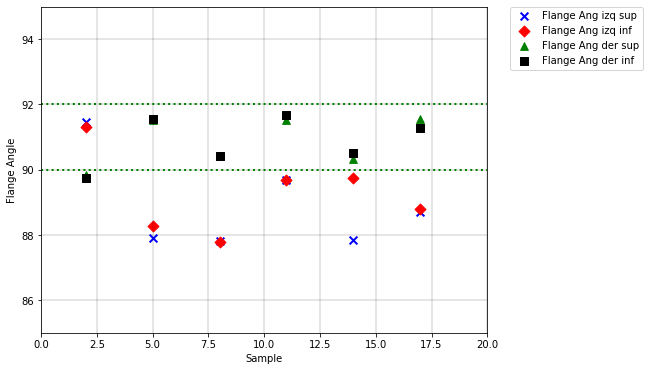

In [8]:
# plotting data for flange
fig, ax = plt.subplots(figsize=(8,6))

# labels
plt.xlabel('Sample')
plt.ylabel('Flange Angle')
mpl.rcParams['lines.linewidth']=2

# limits
FL_LSU=92
FL_LSI=90
line_U = mlines.Line2D([0, 20], [FL_LSU, FL_LSU], color='green',linestyle='dotted')
line_I = mlines.Line2D([0, 20], [FL_LSI, FL_LSI], color='green',linestyle='dotted')
ax.add_line(line_U)
ax.add_line(line_I)

# Data
Mark_Size=60
plt.scatter(df_doorsFLM['Sample'],df_doorsFLM['Flange Angle IZQ SUP (jaladera)'],c='b',label='Flange Ang izq sup',marker='x',s=Mark_Size)
plt.scatter(df_doorsFLM['Sample'],df_doorsFLM['Flange Angle IZQ INF'],c='r',label='Flange Ang izq inf',marker='D',s=Mark_Size)
plt.scatter(df_doorsFLM['Sample'],df_doorsFLM['Flange Angle DER SUP (bisagra)'],c='g',label='Flange Ang der sup',marker='^',s=Mark_Size)
plt.scatter(df_doorsFLM['Sample'],df_doorsFLM['Flange Angle DER INF'],c='k',label='Flange Ang der inf',marker='s',s=Mark_Size)

# Legend
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0)

# Scale
plt.xlim(0,20)
plt.ylim(85,95)

# Grid
plt.grid(color='black',linewidth=0.2,linestyle='-')


plt.show()

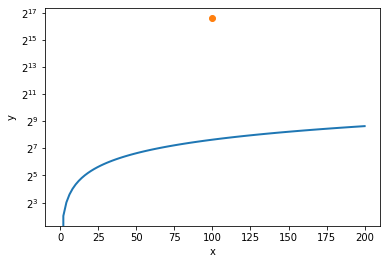

In [17]:
x=np.linspace(0,200,100)
y=x*2

plt.figure()
plt.plot(x,y)

plt.plot([100],[100000],'o')

plt.xlabel('x')
plt.ylabel('y')

#plt.yscale('log')
plt.yscale('log',basey=2) # changing the logarthimic base
plt.show()

In [ ]:
# data to be plotted
x=np.linspace(-200,200,100)
y=x*2

# setup subplot with 3 rows and 2 columns with shared x-axis
f, axarr=plt.subplots(nrows=3,ncols=2,figsize=(8,10),sharex=True)

# linear scale
axarr[0,0].plot(x,y)
axarr[0,0].plot([-200,200],[10,10])

# horizontal lane (y=10)
axarr[0,0].set_title('Linear scale')

# log scale, mask non-positive numbers
axarr[0,1].plot(x,y)
axarr[0,1].plot([-200,200],[10,10])
axarr[0,1].set_title('Log scale',nonposy='mask')
axarr[0,1].set_yscale('log',nonposy='mask')

#log scale, climp non-positive numbers
axarr[1,0].plot(x,y)
axarr[1,0].plot([-200,200],[10,10])
axarr[1,0].set_title('Log scale',nonposy='clip')

# symlog scale
axarr[1,1].plot(x,y)